# GRS example

In this example it is shown how to use chopper.py using observation of Jupiter GRS by Juno/JIRAM during its first perijove passage (2016). In particular this notebook try to replicate figures A.7 and 9 from Biagiotti et al. 2025 "Machine-Learning Spectral Clustering Techniques: Application to Jovian Clouds from Juno/JIRAM and JWST/NIRSpec"

In [1]:
# import necessary libraries to run choppe and analyze its results

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# set the plot style

params= { 'font.family':'sans-serif',
            "font.weight":"bold",
                'xtick.labelsize':10,
                'ytick.labelsize':10
    }

matplotlib.rcParams.update(params)

In [2]:
# read and store the input spectra

spectra_file=pd.read_csv("input_spectra_40.txt",  header=None, sep='\s+', engine='python')
spectra=spectra_file.to_numpy()

These are a fraction (40 %) of the spectra of Jupiter Great Red Spot collected by Juno/JIRAM during its first perijove passage, and published in Biagiotti et al. 2025 "Machine-Learning Spectral Clustering Techniques: Application to Jovian Clouds from Juno/JIRAM and JWST/NIRSpec"

The entire dataset is also available at: https://pds-atmospheres.nmsu.edu/data_and_services/atmospheres_data/JUNO/jiram.html
If you desire to use them, feel free to contact the JIRAM PI Alessandro Mura at alessandro.mura@inaf.it

In [3]:
# import chopper

import chopper as chopper

In [4]:
# run chopper using the desired flags

labels, clusters, coefficients, mean_spectra, mean_std= chopper.do_Clustering(input_spectra=spectra, flag_solar_correction=False, flag_PCA=False,
                                                      flag_GMM=False, flag_N_clusters=False)

#########################################################################
################## directly from the ghost crew...... ###################
#########################################################################

ˇ       --~~--_      ˇ 
|____/~/_|  |_\~\____|
    |____________|                    Welcome user :)
    |[][][][][][]|:=  .               I'm here to help you 
  __| __         |__ \  ' .          / with your collection of spectra !
 |  ||. |   ==   |  |  \    ' .     /  
(|  ||__|   ==   |  |)   \      '<
 |  |[] []  ==   |  |      \    '\|
 |  |____________|  |        \    |
 /__\     |_|    /__\          \ / \

#########################################################################
################# chopper.py v1 written by @astro-francy ################
#########################################################################

/~/_|  |_\~\ --- PCA step


/~/_|  |_\~\ --- Clustering step

Based on k-elbow method, a possible optimal number of clusters is: 4

/~/

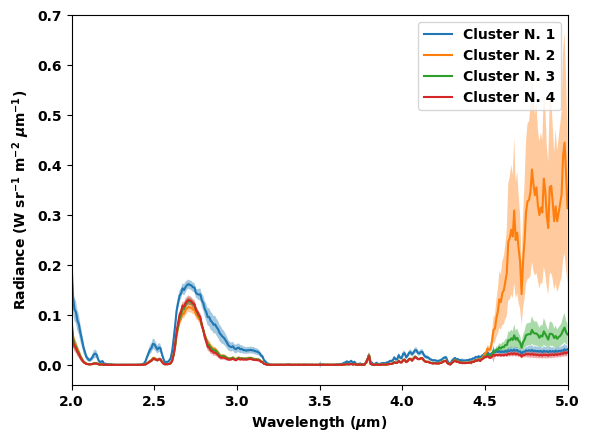

In [5]:
# plot the results 

K=len(mean_spectra[:,0])
wv=np.linspace(2, 5, len(spectra[0]))


for i in range(K):
    plt.plot(wv, mean_spectra[i], label="Cluster N. "+str(int(i+1)))
    plt.fill_between(wv, mean_spectra[i]-mean_std[i], mean_spectra[i]+mean_std[i], alpha=0.4)
plt.xlim(min(wv), max(wv))
plt.xlabel(r"Wavelength ($\mu$m)", fontweight="bold")
plt.ylabel(r"Radiance (W sr$^{-1}$ m$^{-2}$ $\mu$m$^{-1}$)", fontweight="bold")
plt.legend()
plt.show()

In [6]:
# plot the results using an ancillary file

ancillary_file=pd.read_csv("input_log_40.txt",  header=None, sep='\s+', engine='python')

ancillary1=ancillary_file[0]
ancillary2=ancillary_file[1] 

label_ax="System III West Longitude (°)"
label_ay="Planetocentric Latitude (°)"

These are the longitude and latitude values (40 %) associated to the Jupiter-GRS spectra collected by Juno/JIRAM during PJ1.
They are published in Biagiotti et al. 2025 "Machine-Learning Spectral Clustering Techniques: Application to Jovian Clouds from Juno/JIRAM and JWST/NIRSpec".

The entire dataset is available at: https://pds-atmospheres.nmsu.edu/data_and_services/atmospheres_data/JUNO/jiram.html
If you wish to use them feel free to contact JIRAM PI Alessandro Mura at alessandro.mura@inaf.it

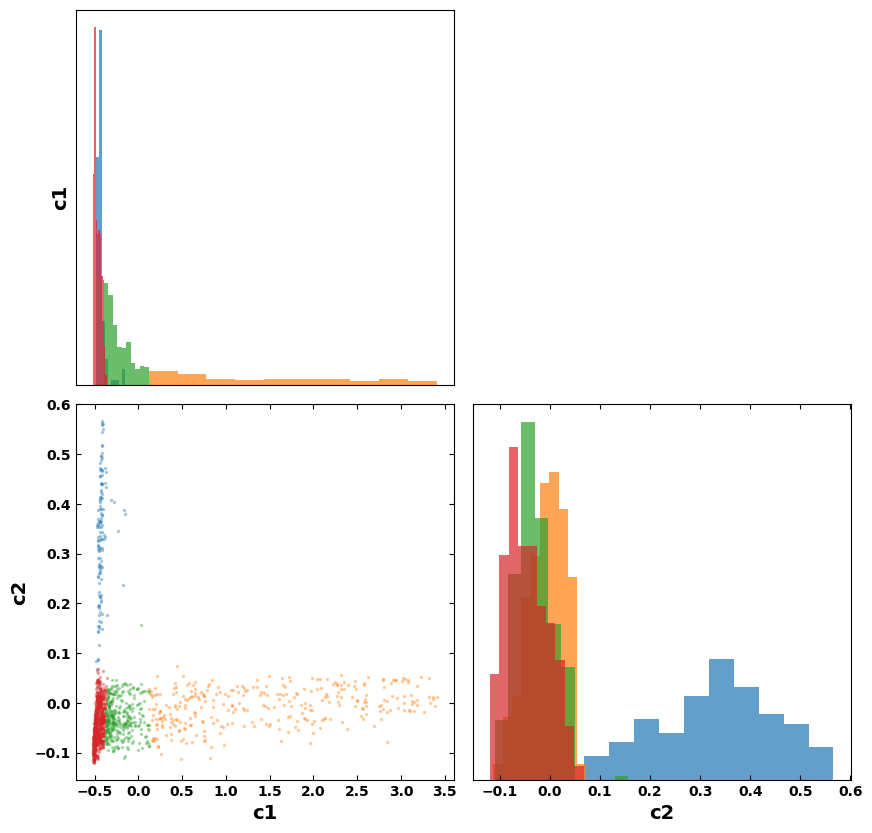

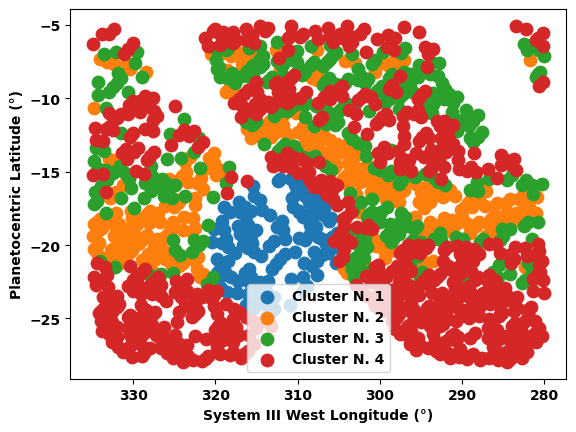

In [7]:
ca1=[]
ca2=[]

for i in range(K):
    ca1.append([])
    ca2.append([])

for i in range(K):
    ca1[i].append([ancillary1[j] for j in clusters[i]])
    ca2[i].append([ancillary2[j] for j in clusters[i]])

dimensions=len(coefficients[0])

clabels=[]

for i in range(dimensions):
    clabels.append("c"+str(int(i+1)))

num_variables=dimensions
num_plots = num_variables
fig, axes = plt.subplots(num_plots, num_plots, figsize=(10, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for idx, ax in enumerate(axes.flat):
    i = idx // num_variables 
    j = idx % num_variables   

    if j > i:
        ax.set_visible(False)
        continue

    if i == j:
        for cas in range(K):
            x_data=[coefficients[bix,j] for bix in clusters[cas]]
            ax.hist(x_data, bins=10, density=True, histtype='stepfilled', alpha=0.7)
            ax.set_yticks([]) 
    else:
        for hera in range(K):
            x_data=[coefficients[kanan,j] for kanan in clusters[hera]]
            y_data=[coefficients[kanan,i] for kanan in clusters[hera]]
            ax.plot(x_data, y_data, '.', markersize=3, alpha=0.3)


    if i != num_variables - 1:
        ax.set_xticks([])
    else:
        ax.set_xlabel(clabels[j], fontsize=14, fontweight="bold")
    if j != 0:
        ax.set_yticks([])
    else:
        ax.set_ylabel(clabels[i], fontsize=14, fontweight="bold")
    if i == j and i != num_variables - 1:
        ax.set_xticks([])
    ax.tick_params(direction='in', top=True, right=True, labelsize=10)


plt.show()


for i in range(K):
    plt.scatter(ca1[i], ca2[i], s=80, label="Cluster N. "+str(int(i+1)))
plt.gca().invert_xaxis()
plt.xlabel(label_ax, fontweight="bold")
plt.ylabel(label_ay, fontweight="bold")
plt.legend()
plt.show()

If we use both the PCA and GMM flags we can reproduce Fig. 9 of Biagiotti et al. 2025

We need to set a variance threshold that includes the first 4 components (input must be 0.9985)

Then we select only the 2nd and 4th component to perform the GMM clustering (input must be [2,4])

#########################################################################
################## directly from the ghost crew...... ###################
#########################################################################

ˇ       --~~--_      ˇ 
|____/~/_|  |_\~\____|
    |____________|                    Welcome user :)
    |[][][][][][]|:=  .               I'm here to help you 
  __| __         |__ \  ' .          / with your collection of spectra !
 |  ||. |   ==   |  |  \    ' .     /  
(|  ||__|   ==   |  |)   \      '<
 |  |[] []  ==   |  |      \    '\|
 |  |____________|  |        \    |
 /__\     |_|    /__\          \ / \

#########################################################################
################# chopper.py v1 written by @astro-francy ################
#########################################################################

/~/_|  |_\~\ --- PCA step

You checked the PCA flag.
Now I will display you the first 10 PCA eigenvectors and the relative cumulative v

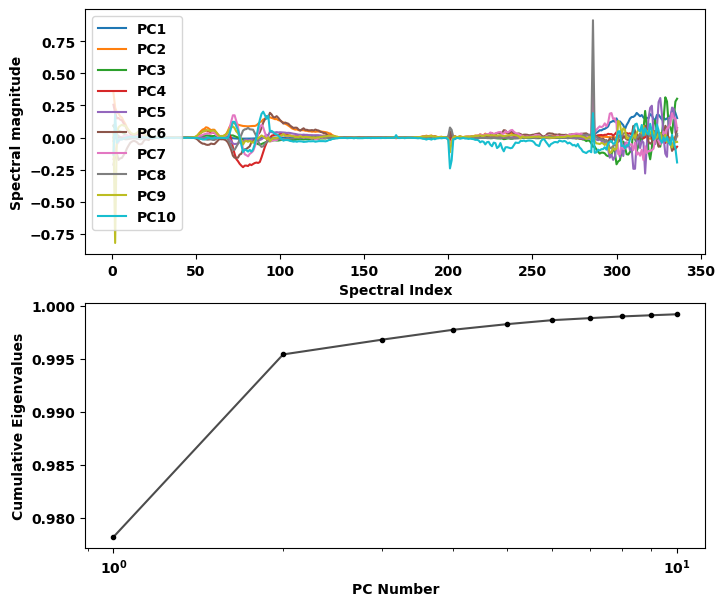


/~/_|  |_\~\ --- Clustering step

You checked the #1 GMM flag.
Now I will display you the PCA eigenvectors
Keep them in mind ^.^


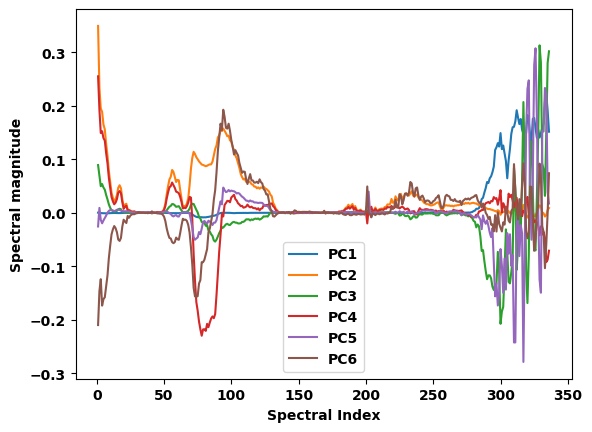


Now I will display the corresponding PCA decomposition coefficients cornerplot
Keep it in mind ^.^


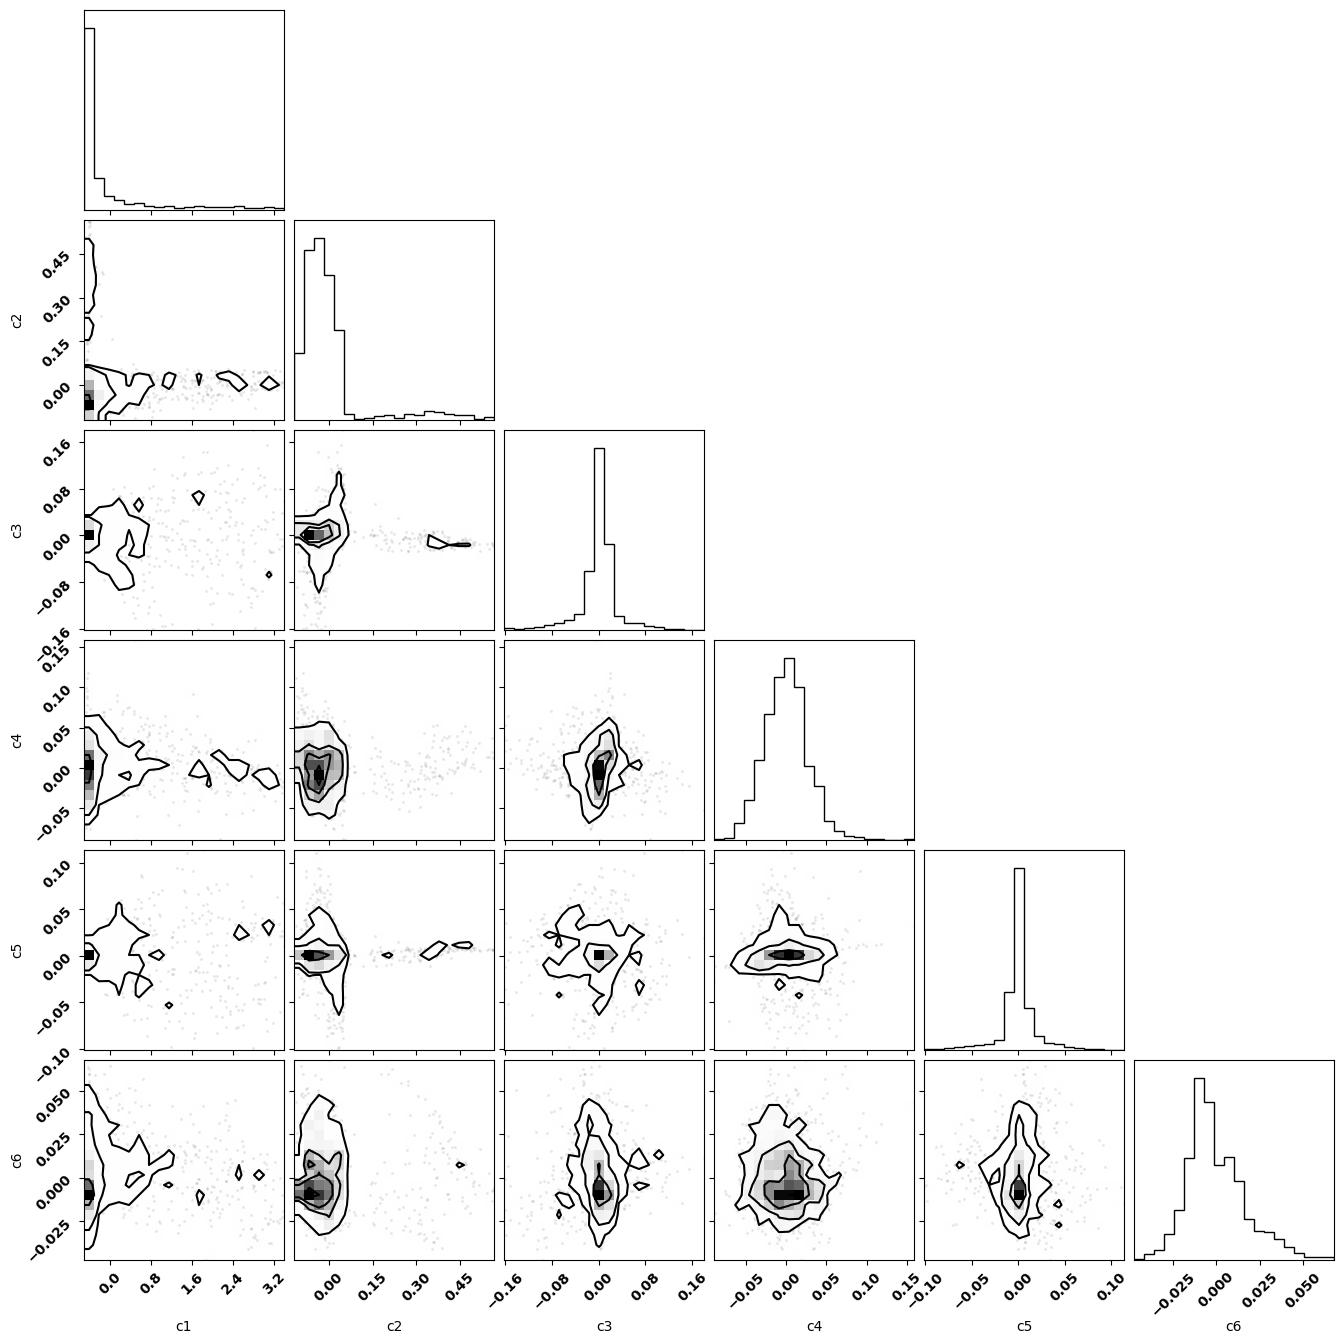


Please insert the coefficients on which you desire that the GMM will be performed :)
Based on k-elbow method, a possible optimal number of clusters is: 4

/~/_|  |_\~\ --- Done. Bye :)



In [8]:
# run chopper using the desired flags

labels, clusters, coefficients, mean_spectra, mean_std= chopper.do_Clustering(input_spectra=spectra, flag_solar_correction=False, flag_PCA=True,
                                                      flag_GMM=True, flag_N_clusters=False)

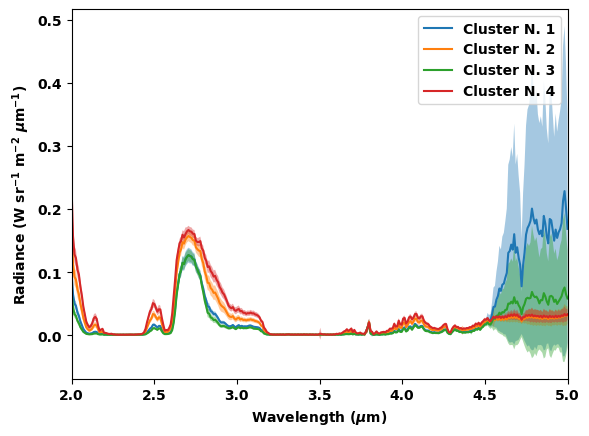

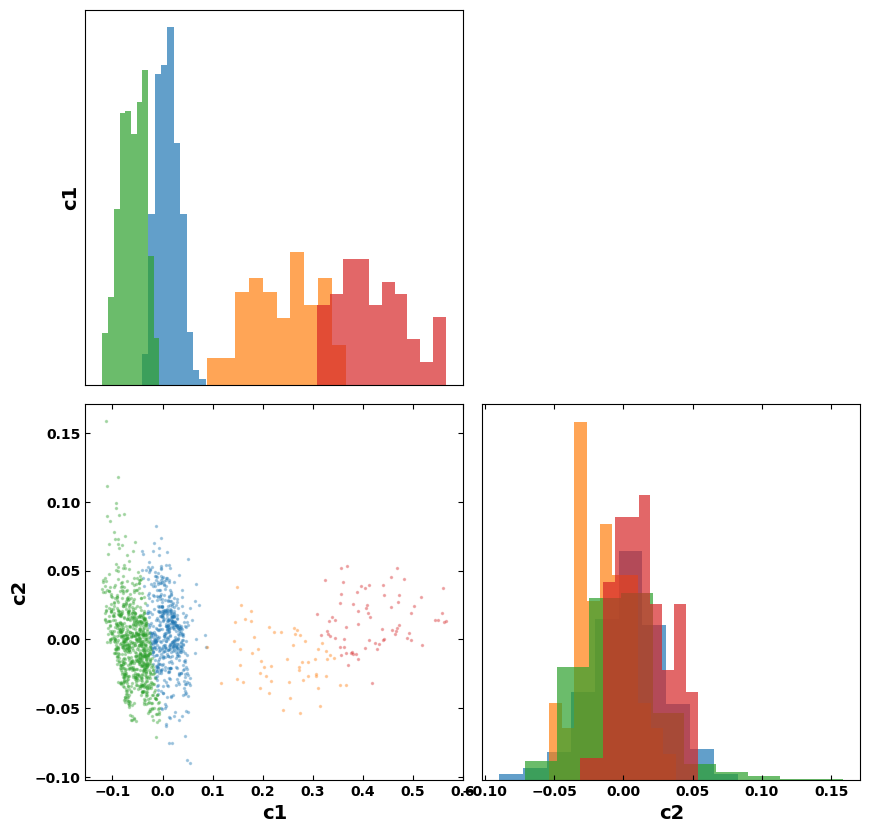

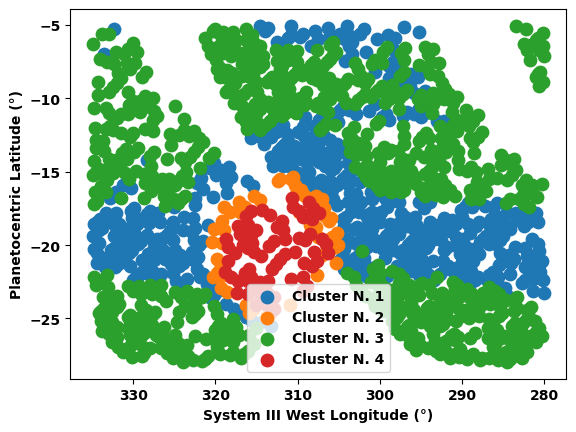

In [9]:
# plot the results 

K=len(mean_spectra[:,0])
wv=np.linspace(2, 5, len(spectra[0]))


for i in range(K):
    plt.plot(wv, mean_spectra[i], label="Cluster N. "+str(int(i+1)))
    plt.fill_between(wv, mean_spectra[i]-mean_std[i], mean_spectra[i]+mean_std[i], alpha=0.4)
plt.xlim(min(wv), max(wv))
plt.xlabel(r"Wavelength ($\mu$m)", fontweight="bold")
plt.ylabel(r"Radiance (W sr$^{-1}$ m$^{-2}$ $\mu$m$^{-1}$)", fontweight="bold")
plt.legend()
plt.show()

ca1=[]
ca2=[]

for i in range(K):
    ca1.append([])
    ca2.append([])

for i in range(K):
    ca1[i].append([ancillary1[j] for j in clusters[i]])
    ca2[i].append([ancillary2[j] for j in clusters[i]])

dimensions=len(coefficients[0])

clabels=[]

for i in range(dimensions):
    clabels.append("c"+str(int(i+1)))

num_variables=dimensions
num_plots = num_variables
fig, axes = plt.subplots(num_plots, num_plots, figsize=(10, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for idx, ax in enumerate(axes.flat):
    i = idx // num_variables 
    j = idx % num_variables   

    if j > i:
        ax.set_visible(False)
        continue

    if i == j:
        for cas in range(K):
            x_data=[coefficients[bix,j] for bix in clusters[cas]]
            ax.hist(x_data, bins=10, density=True, histtype='stepfilled', alpha=0.7)
            ax.set_yticks([]) 
    else:
        for hera in range(K):
            x_data=[coefficients[kanan,j] for kanan in clusters[hera]]
            y_data=[coefficients[kanan,i] for kanan in clusters[hera]]
            ax.plot(x_data, y_data, '.', markersize=3, alpha=0.3)


    if i != num_variables - 1:
        ax.set_xticks([])
    else:
        ax.set_xlabel(clabels[j], fontsize=14, fontweight="bold")
    if j != 0:
        ax.set_yticks([])
    else:
        ax.set_ylabel(clabels[i], fontsize=14, fontweight="bold")
    if i == j and i != num_variables - 1:
        ax.set_xticks([])
    ax.tick_params(direction='in', top=True, right=True, labelsize=10)


plt.show()


for i in range(K):
    plt.scatter(ca1[i], ca2[i], s=80, label="Cluster N. "+str(int(i+1)))
plt.gca().invert_xaxis()
plt.xlabel(label_ax, fontweight="bold")
plt.ylabel(label_ay, fontweight="bold")
plt.legend()
plt.show()